# Template matching with correlation filter

In [1]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal

Load the image, and subtract the mean

In [2]:
orig = cv2.imread('assets/images/cameraman.png', cv2.IMREAD_GRAYSCALE) # Chose your own location
orig = orig - orig.mean()

Display the image

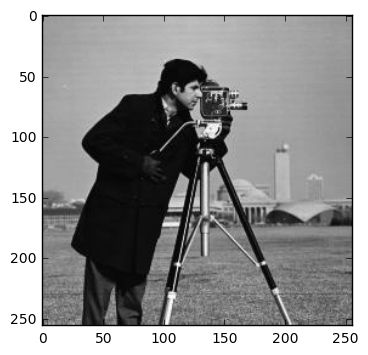

In [3]:
plt.imshow(orig, cmap='gray')

Crop out the head and display it

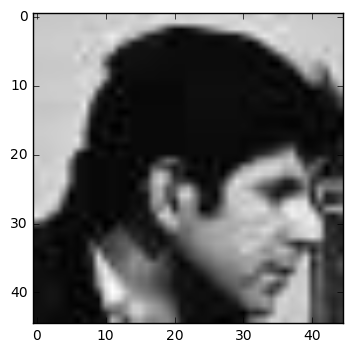

In [4]:
template = orig[35:80, 90:135]
plt.imshow(template, cmap='gray')

Add gaussian noise to the image

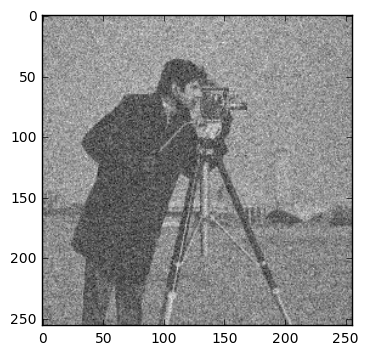

In [5]:
orig = orig + np.random.randn(*orig.shape)*50
plt.imshow(orig, cmap='gray')

Compute correlation image

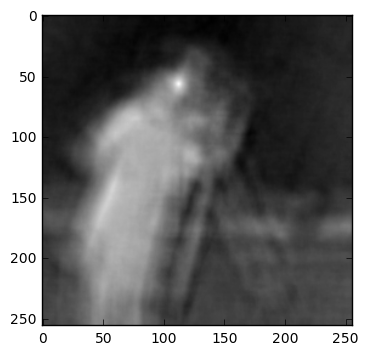

In [6]:
match = signal.correlate2d(orig, template, mode='same', boundary='symm')
plt.imshow(match, cmap='gray')

Find the match

In [7]:
y, x = np.unravel_index(np.argmax(match), match.shape)

In [8]:
print(x)
print(y)

112
57


(256, 0)

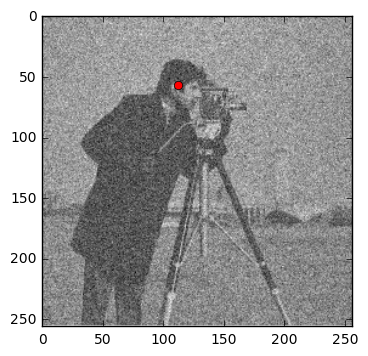

In [9]:
plt.imshow(orig, cmap='gray')
plt.plot(x, y, 'ro')
# Remove redundant space left by the plt.plot() commands
axes = plt.gca()
axes.set_xlim([0, orig.shape[1]])
axes.set_ylim([orig.shape[0], 0])